*Link do vídeo no Mineirando Dados*


https://www.youtube.com/watch?v=28dG0gyXz80

# Links das documentações das librarys



*   yfinance: https://algotrading101.com/learn/yfinance-guide/
*   investpy: https://investpy.readthedocs.io
*   pybovespa: https://pypi.org/project/pybovespa/
*   quandl: https://www.quandl.com
*   pandas finance: https://pypi.org/project/pandas-finance/
*   pandas reader: https://pandas-datareader.readthedocs.io/en/latest/



In [ ]:
#instalando com pip
!pip install pandas --upgrade --no-cache-dir
!pip install yfinance --upgrade --no-cache-dir
!pip install statsmodels --upgrade --no-cache-dir

     |████████████████████████████████| 9.9MB 6.5MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


     |████████████████████████████████| 6.3MB 8.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=690f9452f782d75bdec599d517e0a9a57674bf0318fea7192c655d20b0768753
  Stored in directory: /tmp/pip-ephem-wheel-cache-zyqonwyp/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 9.5MB 5.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose

# **1) Aquisição dos dados de ações**


In [ ]:
ticker = yf.Ticker('^BVSP') #ticker ibovespa

# 1ª forma de trazer os dados
#df = ticker.history(period = '3y', interval = '1mo')

# 2 ª firna de trazer os dados
df = ticker.history(interval = '1d', start = '2018-01-01', end = '2021-01-01')

In [ ]:
df # conferindo o dataframe


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0
2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0
2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0
2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0
2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0
...,...,...,...,...,...,...,...
2020-12-22,115825.0,116903.0,115648.0,116348.0,6947900,0,0
2020-12-23,116636.0,118311.0,116636.0,117857.0,6483300,0,0
2020-12-28,117806.0,119213.0,117805.0,119051.0,7171700,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2018-01-02 to 2020-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          739 non-null    float64
 1   High          739 non-null    float64
 2   Low           739 non-null    float64
 3   Close         739 non-null    float64
 4   Volume        739 non-null    int64  
 5   Dividends     739 non-null    int64  
 6   Stock Splits  739 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 46.2 KB


In [ ]:
df.tail(10) # conferindo os últimos 10 rows pra ver se tudo rodou bonitin

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-15,114613.0,116390.0,114613.0,116146.0,8195100,0,0
2020-12-16,116149.0,118178.0,115496.0,117947.0,9808100,0,0
2020-12-17,117864.0,119027.0,117856.0,118157.0,7701400,0,0
2020-12-18,118395.0,119370.0,117639.0,117679.0,8636000,0,0
2020-12-21,118021.0,118021.0,114730.0,116016.0,10347100,0,0
2020-12-22,115825.0,116903.0,115648.0,116348.0,6947900,0,0
2020-12-23,116636.0,118311.0,116636.0,117857.0,6483300,0,0
2020-12-28,117806.0,119213.0,117805.0,119051.0,7171700,0,0
2020-12-29,119130.0,119861.0,118750.0,119475.0,6769700,0,0


# **2) Decomposição de uma série temporal**

**Modelos matemáticos**

https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


*    Additive Model 
      y(t) = Trend_t + Seasonality_t + Noise_t   <- é mais sensível porque soma.
      Da a própria série temporal 
  
*    Multiplicative Model
      y(t) = Trend_t * Seasonality_t * Noise_t <- é menos sensível porque multiplica, a variação é menor.
      Da a própria série temporal

      Para decompor primeiro é necessário pegar o valor e depois o intervalo de tempo
      Da para usar um ou outro, ou os dois juntos.


In [ ]:
type(df) # vendo qual o tipo de dado
 

pandas.core.frame.DataFrame

In [ ]:
df[['Close']].info() # Para detalhar o tipo de dado

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2018-01-02 to 2020-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   739 non-null    float64
dtypes: float64(1)
memory usage: 11.5 KB


In [ ]:
df[['Close']]

,Close
Date,
2018-01-02,77891.0
2018-01-03,77995.0
2018-01-04,78647.0
2018-01-05,79071.0
2018-01-08,79379.0
...,...
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0


In [ ]:
# Primeiro passsa a série, depois o tipo de modelo, período baseado em 30 dias/dados média móvel, e extrapolate_trend pra n deixar nulo, preencha com o próprio dado?

decomposicao = seasonal_decompose(df[['Close']], model='additive', period = 30, extrapolate_trend= 30)


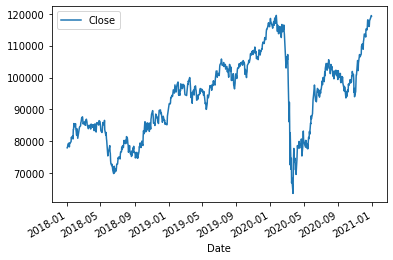

In [ ]:
df[['Close']].plot() #plotando o ibovespa

In [ ]:
df['Close'].head() # observando a soma dos dados dar a própria série temporal

Date
2018-01-02    77891.0
2018-01-03    77995.0
2018-01-04    78647.0
2018-01-05    79071.0
2018-01-08    79379.0
Name: Close, dtype: float64

In [ ]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

Date
2018-01-02     77891.0
2018-01-03     77995.0
2018-01-04     78647.0
2018-01-05     79071.0
2018-01-08     79379.0
                ...   
2020-12-22    116348.0
2020-12-23    117857.0
2020-12-28    119051.0
2020-12-29    119475.0
2020-12-30    119306.0
Length: 739, dtype: float64

In [ ]:
decomposicao.trend.iloc[0:5]

Date
2018-01-02    80608.120699
2018-01-03    80729.378145
2018-01-04    80850.635591
2018-01-05    80971.893038
2018-01-08    81093.150484
Name: trend, dtype: float64

In [ ]:
decomposicao_multi = seasonal_decompose(df[['Close']], model = 'multiplicative', period = 30, extrapolate_trend= 30)
decomposicao_multi.seasonal #observando o output

Date
2018-01-02    1.000411
2018-01-03    0.995063
2018-01-04    0.994163
2018-01-05    0.992405
2018-01-08    0.995267
                ...   
2020-12-22    0.999201
2020-12-23    0.996152
2020-12-28    1.001220
2020-12-29    1.000271
2020-12-30    1.005005
Name: seasonal, Length: 739, dtype: float64

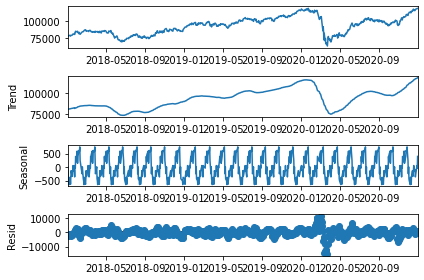

In [ ]:
decomposicao.plot(); #Plotando o ibov separado por: tendencia, seasonalidade e resíduo


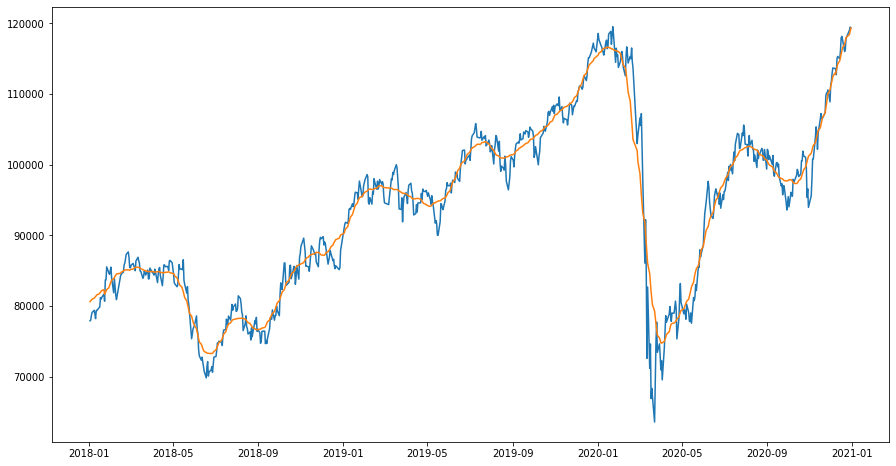

In [ ]:
ax, fig = plt.subplots(figsize = (15,8))
plt.plot(decomposicao.observed) # Azul
plt.plot(decomposicao.trend) # Laranjinha

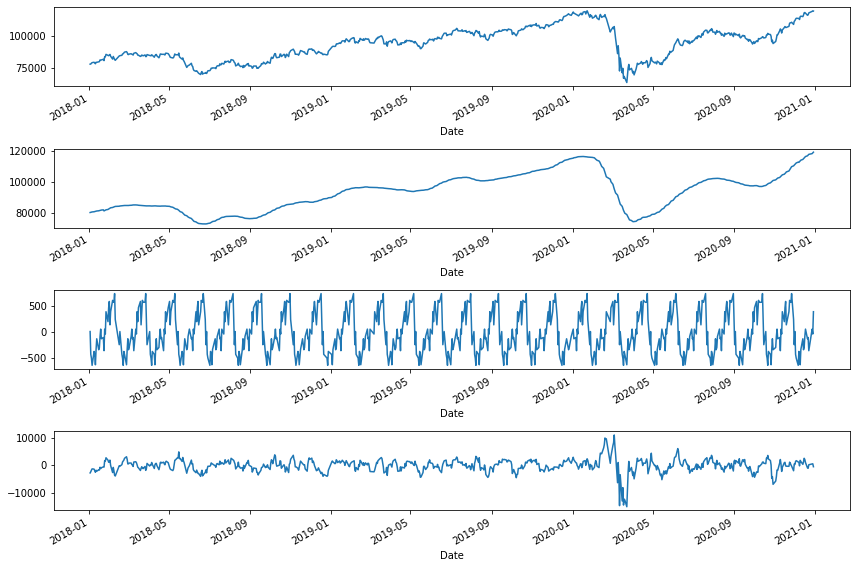

In [ ]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (12,8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()

# **3) Cáculo média móvel**

In [ ]:
df['Close'].rolling(7).mean() # calculando a media movel. Pega uma janela de 7, calcula média deles e define o próximo elemento

Date
2018-01-02              NaN
2018-01-03              NaN
2018-01-04              NaN
2018-01-05              NaN
2018-01-08              NaN
                  ...      
2020-12-22    116752.571429
2020-12-23    117164.285714
2020-12-28    117579.285714
2020-12-29    117797.571429
2020-12-30    117961.714286
Name: Close, Length: 739, dtype: float64

In [ ]:
media_movel7d = df['Close'].rolling(7).mean() # 7 dias de dados
media_movel14d = df['Close'].rolling(14).mean() # '4 dias de dados
media_model21d = df['Close'].rolling(21).mean() # 21 dias de dados

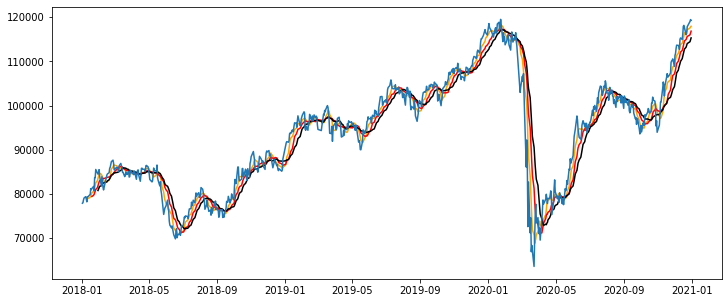

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))
plt.plot(media_movel7d, 'orange')
plt.plot(media_movel14d, 'red')
plt.plot(media_model21d, 'black')
plt.plot(df['Close'])

# **4) Extração de Features**

Uma série temporal tem dados date e value, e variáveis que implicam nesses dados (eventos externos) e pode integrar ou extrair features desses dados.

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0
2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0
2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0
2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0
2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0


In [ ]:
df.reset_index(inplace = True) # resetar o indice

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0


In [ ]:
df['Date'].dt.year #ano



0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
734    2020
735    2020
736    2020
737    2020
738    2020
Name: Date, Length: 739, dtype: int64

In [ ]:
# Criando features para cada período
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0,2018,1,2
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0,2018,1,3
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0,2018,1,4
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0,2018,1,5
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0,2018,1,8


In [ ]:
# Calculando a rentabilidade 
#preço atual/preço anterior * 100 - 100
df[['Close']]

,Close
0,77891.0
1,77995.0
2,78647.0
3,79071.0
4,79379.0
...,...
734,116348.0
735,117857.0
736,119051.0
737,119475.0


In [ ]:
df['Close'].shift() # empurra o vetor pra frente

0           NaN
1       77891.0
2       77995.0
3       78647.0
4       79071.0
         ...   
734    116016.0
735    116348.0
736    117857.0
737    119051.0
738    119475.0
Name: Close, Length: 739, dtype: float64

In [ ]:
df['rentabilidade'] = df['Close'] / df['Close'].shift() * 100 - 100

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0,2018,1,2,NaN
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0,2018,1,3,0.133520
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0,2018,1,4,0.835951
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0,2018,1,5,0.539118
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0,2018,1,8,0.389523


In [ ]:
def features_extration(df_):
  # criar as features para cada período
  # Criando features para cada período
  df_['year'] = df_['Date'].dt.year
  df_['month'] = df_['Date'].dt.month
  df_['day'] = df_['Date'].dt.day

  df_['rentabilidade'] = df_['Close'] / df_['Close'].shift() * 100 - 100

In [ ]:
df.reset_index(inplace = True)

In [ ]:
features_extration(df)

In [ ]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade
0,0,2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0,2018,1,2,NaN
1,1,2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0,2018,1,3,0.133520
2,2,2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0,2018,1,4,0.835951
3,3,2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0,2018,1,5,0.539118
4,4,2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0,2018,1,8,0.389523


# **Testando hipóteses**

## Hipótese 1 - Existe um melhor mês para investir no ativo?


*   Considerando 3 anos de dados de rentabilidade, o agrupamento mostra que os meses de janeiro, junho e setembro são os mais interessantes para investir.
   



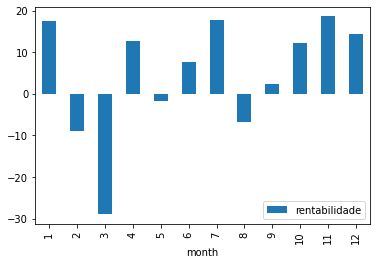

In [ ]:
df.groupby("month").agg({'rentabilidade':'sum'}).plot(kind='bar') # agg recebe um dicionario
# nesse gráfico tem ruído

In [ ]:
df.set_index('Date', inplace = True)

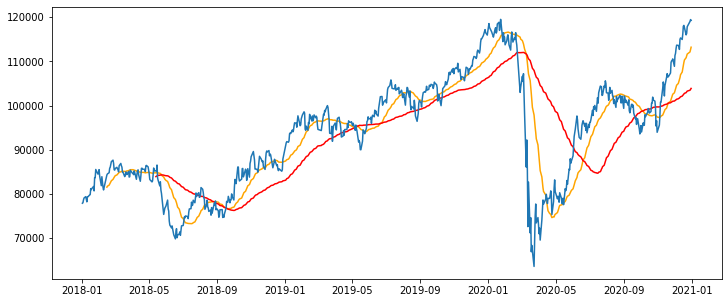

In [ ]:
media_movel30d = df['Close'].rolling(30).mean() 
media_movel90d = df['Close'].rolling(90).mean()

fig, ax = plt.subplots(figsize = (12,5))
plt.plot(media_movel30d, 'orange')
plt.plot(media_movel90d, 'red')
plt.plot(df['Close'])

## Hipóetese 2 - Existe um melhor dia para investir no ativo?


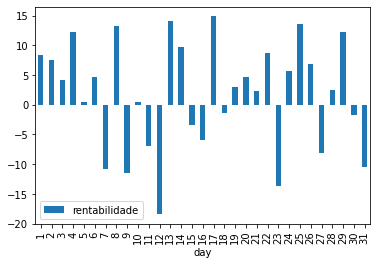

In [ ]:
df.groupby("day").agg({'rentabilidade':"sum"}).plot(kind='bar')

In [ ]:
df.iloc[0]

index                  0.0
Open               76403.0
High               77909.0
Low                76403.0
Close              77891.0
Volume           2880300.0
Dividends              0.0
Stock Splits           0.0
year                2018.0
month                  1.0
day                    2.0
rentabilidade          NaN
Name: 2018-01-02 00:00:00, dtype: float64

In [ ]:
df.iloc[-1]

index            7.380000e+02
Open             1.194100e+05
High             1.201500e+05
Low              1.189190e+05
Close            1.193060e+05
Volume           8.235700e+06
Dividends        0.000000e+00
Stock Splits     0.000000e+00
year             2.020000e+03
month            1.200000e+01
day              3.000000e+01
rentabilidade   -1.414522e-01
Name: 2020-12-30 00:00:00, dtype: float64

In [ ]:
df['Close'].iloc[-1] / df['Close'].iloc[0] * 100 - 100

53.17045615026126

# 5) Correlação de séries temporais

In [ ]:
tickers = ['VALE3.SA', 'ITUB4.SA', 'PETR4.SA', 'ABEV3.SA', 'BBDC4.SA', '^BVSP', 'USDBRL=X']

In [ ]:
dfs = []

for t in tickers:
  print('Reading ticker {} ...'.format(t))
  ticker = yf.Ticker(t)
  aux = ticker.history(interval='1d', start = '2018-01-01', end = '2021-01-01')
  aux.reset_index(inplace = True)
  aux['ticker'] = t
  dfs.append(aux)

Reading ticker VALE3.SA ...
Reading ticker ITUB4.SA ...
Reading ticker PETR4.SA ...
Reading ticker ABEV3.SA ...
Reading ticker BBDC4.SA ...
Reading ticker ^BVSP ...
Reading ticker USDBRL=X ...


In [ ]:
dfs[1]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,2018-01-02,24.577457,25.197636,24.577457,25.197636,16650900,0.01,0.0,ITUB4.SA
1,2018-01-03,25.209130,25.461795,25.019630,25.369917,22295700,0.00,0.0,ITUB4.SA
2,2018-01-04,25.410110,26.013062,25.410110,25.898212,23222550,0.00,0.0,ITUB4.SA
3,2018-01-05,25.909690,26.024538,25.611086,25.972857,15717450,0.00,0.0,ITUB4.SA
4,2018-01-08,25.875252,26.024553,25.714463,25.886736,12708150,0.00,0.0,ITUB4.SA
...,...,...,...,...,...,...,...,...,...
734,2020-12-22,30.737427,31.210765,30.717704,30.816317,19659000,0.00,0.0,ITUB4.SA
735,2020-12-23,30.885346,31.605214,30.836040,31.496742,19959200,0.00,0.0,ITUB4.SA
736,2020-12-28,31.772858,31.979943,31.565769,31.723549,15444600,0.00,0.0,ITUB4.SA
737,2020-12-29,31.822163,31.940496,31.486881,31.654520,16384200,0.00,0.0,ITUB4.SA


In [ ]:
for d in dfs:
  features_extration(d)

In [ ]:
dfs[1]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,year,month,day,rentabilidade
0,2018-01-02,24.577457,25.197636,24.577457,25.197636,16650900,0.01,0.0,ITUB4.SA,2018,1,2,NaN
1,2018-01-03,25.209130,25.461795,25.019630,25.369917,22295700,0.00,0.0,ITUB4.SA,2018,1,3,0.683720
2,2018-01-04,25.410110,26.013062,25.410110,25.898212,23222550,0.00,0.0,ITUB4.SA,2018,1,4,2.082370
3,2018-01-05,25.909690,26.024538,25.611086,25.972857,15717450,0.00,0.0,ITUB4.SA,2018,1,5,0.288221
4,2018-01-08,25.875252,26.024553,25.714463,25.886736,12708150,0.00,0.0,ITUB4.SA,2018,1,8,-0.331579
...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2020-12-22,30.737427,31.210765,30.717704,30.816317,19659000,0.00,0.0,ITUB4.SA,2020,12,22,0.482310
735,2020-12-23,30.885346,31.605214,30.836040,31.496742,19959200,0.00,0.0,ITUB4.SA,2020,12,23,2.208004
736,2020-12-28,31.772858,31.979943,31.565769,31.723549,15444600,0.00,0.0,ITUB4.SA,2020,12,28,0.720096
737,2020-12-29,31.822163,31.940496,31.486881,31.654520,16384200,0.00,0.0,ITUB4.SA,2020,12,29,-0.217595


In [ ]:
correlacao = pd.DataFrame()


for d in dfs:
  correlacao[d['ticker'].iloc[0]] = d['rentabilidade']

In [ ]:
correlacao.head()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,^BVSP,USDBRL=X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.599216,0.683720,0.906364,0.230509,0.454705,0.133520,0.102796
2,0.409922,2.082370,0.179648,-0.551957,1.640698,0.835951,-1.606765
3,1.561012,0.288221,0.597707,0.370011,0.566457,0.539118,-0.684511
4,2.222742,-0.331579,1.188369,-0.184328,-0.028178,0.389523,-0.074182


In [ ]:
correlacao.corr()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,^BVSP,USDBRL=X
VALE3.SA,1.000000,0.405102,0.521127,0.303406,-0.071688,0.659824,0.015217
ITUB4.SA,0.405102,1.000000,0.611530,0.526931,0.143871,0.821111,-0.068693
PETR4.SA,0.521127,0.611530,1.000000,0.441122,0.069685,0.815522,0.007941
ABEV3.SA,0.303406,0.526931,0.441122,1.000000,0.017143,0.625953,-0.016548
BBDC4.SA,-0.071688,0.143871,0.069685,0.017143,1.000000,0.056459,-0.024891
^BVSP,0.659824,0.821111,0.815522,0.625953,0.056459,1.000000,-0.008837
USDBRL=X,0.015217,-0.068693,0.007941,-0.016548,-0.024891,-0.008837,1.000000


## Visualizando os dados com o Searborn


In [ ]:
!pip install seaborn --upgrade --no-cache-dir


Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


In [ ]:
import seaborn as sns


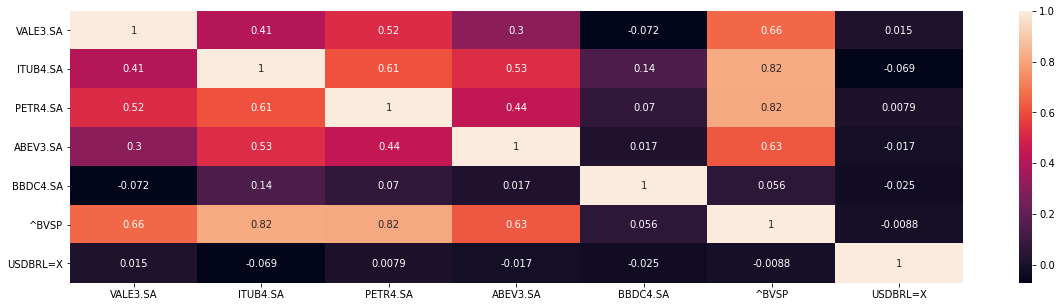

In [ ]:
ax, fig = plt.subplots(figsize = (20,5))
ax = sns.heatmap(correlacao.corr(), annot = True)

## Visualização de dados usando Plotly

In [ ]:
!pip install plotly --upgrade --no-cache-dir

     |████████████████████████████████| 13.2MB 5.1MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.graph_objs as go


In [ ]:
def plot_lines(df_, columns = ["Open", "Close", "High", "Low"]):

  fig = go.Figure()
  for c in columns:
    fig.add_trace(go.Scatter(x = list(df_.index),
                             y = df_[c],
                             mode = 'markers+lines',
                             name = c))
    return fig

In [ ]:
plot_lines(df)

In [ ]:
def plotCandleStick(df, acao = 'ticker'):
  trace1 = {
      'x': df.index,
      'open': df.Open,
      'close': df.Close,
      'high': df.High,
      'low': df.Low,
      'type': 'candlestick',
      'name': acao,
      'showlegend': False
  }

  data = [trace1]
  layout = go.Layout()

  fig = go.Figure(data = data, layout = layout)
  return fig

In [ ]:
plotCandleStick(df)